# <center> **Generación de datos aleatorios** </center>
## <font size=4> **Aprendizaje Estadístico 2025** </font> <font color=gray size=4> -- Alan Reyes-Figueroa </font>

In [1]:
import numpy as np             # cálculo numérico
import scipy as sp
import scipy.stats as st       # estadística

import matplotlib.pyplot as plt  # graficación
import seaborn as sns            # graficación

In [ ]:
import warnings
warnings.filterwarnings('ignore')

En este notebook vamos a usar la librería de $\texttt{scipy.stats}$ para generar datos aleatorios. Vamos a considerar el caso de varias variables aleatorias conocidas, algunas discretas y otras continuas.

## Ejemplo Bernoulli

In [2]:
np.random.seed(12345)       # siempre es adecuado establecer una semilla para efectos de replicabilidad.

In [3]:
# Generar una muestra de una variable Bernoulli Ber(0.5)
# de tamaño N = 1000

N = 1000
p = 0.5
sample = st.bernoulli.rvs(p, size=N)

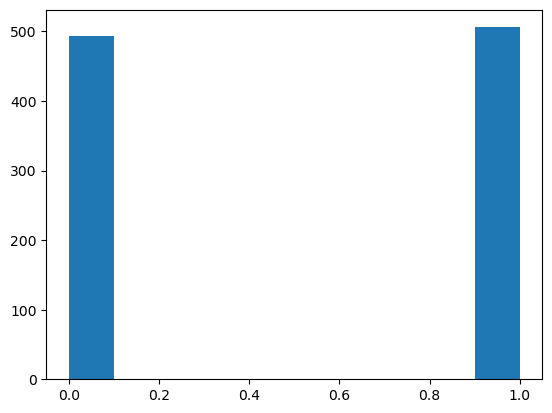

In [4]:
plt.figure()
plt.hist(sample)
plt.show()

In [6]:
print((sample==0).sum())
print((sample==1).sum())

494
506


## Ejemplo Uniforme

In [ ]:
# Generar una muestra de una variable Uniforme U[a,b]
# de tamaño N = 5000

N = 5000
a = 8
b = 18
sample = a + (b-a)*st.uniform.rvs(size=N)

In [ ]:
sample.shape

In [ ]:
print(sample.min())
print(sample.max())

In [ ]:
bns = b - a + 1
plt.figure()
plt.hist(sample, bins=bns)
plt.show()

In [ ]:
bins = np.arange(a, b+1)
bins

In [ ]:
x, y = np.histogram(sample, bins=bins)

In [ ]:
print(x.shape, y.shape)

Graficamos a continuación la función de densidad (se obtiene dividiendo el histograma dentro del número de datos $N$).

También graficamos la función de distribución (esta se obtiene haciendo la suma acumulada del histograma y dividiendo entre $N$).

In [ ]:
plt.figure()
plt.plot(y[:-1], x/N, '--', label='mass')
plt.plot(y[:-1], x.cumsum()/N, '-', label='distribution')
plt.legend()
plt.show()

In [ ]:
# imprimiendo el valor exacto de la probabilidad para cada x
for i in range(a, b):
    print(i, ((sample >= i) & (sample < i+1)).sum() / N)

## Ejemplo Binomial

In [ ]:
# Generar una muestra de una variable Binomial Bin(k, p)
# de tamaño N = 10000

N = 10000
k = 25
p = 0.5
sample = st.binom.rvs(k, p=p, size=N)

In [ ]:
sample.shape

In [ ]:
sample[:44]

In [ ]:
bns = sample.max() - sample.min() + 1
plt.figure()
plt.hist(sample, bins=bns)
plt.xlim([0,k])
plt.show()

In [ ]:
bins = np.arange(sample.min(), sample.max()+1)
x, y = np.histogram(sample, bins=bns)

In [ ]:
plt.figure()
plt.plot(y[1:], x/N, '--', label='mass')
plt.plot(y[1:], x.cumsum()/N, '-', label='distribution')
plt.legend()
plt.show()

In [ ]:
# imprimiendo el valor de probabilidad para cada x
for i in range(0, k+1):
    print('%02d %5.5f %5.5f' % (i, (sample==i).sum() / N, sp.special.binom(k, i)/(2**k)))

In [ ]:
sample.mean()    #media empírica

In [ ]:
k*p              #media teórica

In [ ]:
error = np.abs(sample.mean() - k*p) / (k*p)
print(error)
print('error = {}%'.format(error * 100))

## Ejemplo Geométrica

In [11]:
# Generar una muestra de una variable Binomial Bin(k, p)
# de tamaño N = 10000

N = 10000
p = 0.25
sample = st.geom.rvs(p=p, size=N)

In [12]:
sample.shape

(10000,)

In [13]:
sample[:44]

array([ 3,  3,  6, 13,  3,  1,  5,  2,  6,  2,  7,  2,  4,  4,  2,  8,  4,
        2,  2,  4,  2,  8,  4,  8,  4,  1,  6,  6,  4,  2,  2,  1,  2,  6,
        7,  9,  3,  3,  1, 11,  2,  1,  2,  1])

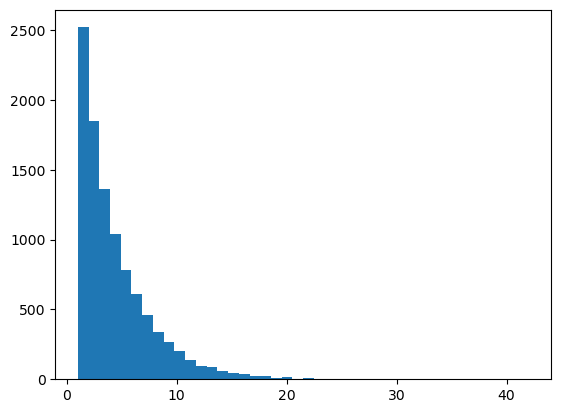

In [14]:
bns = sample.max() - sample.min() + 1
plt.figure()
plt.hist(sample, bins=bns)
plt.show()

In [ ]:
bins = np.arange(sample.min(), sample.max()+1)
x, y = np.histogram(sample, bins=bns)

In [ ]:
plt.figure()
plt.plot(y[1:], x/N, '--', label='mass')
plt.plot(y[1:], x.cumsum()/N, '-', label='distribution')
plt.legend()
plt.show()

In [ ]:
# imprimiendo los valores de probabilidad
for i in range(1, sample.max()+1):
    print(i, (sample==i).sum() / N)

In [ ]:
sample.mean()   #media empírica

In [ ]:
1/p             #media teórica

In [ ]:
error = np.abs(sample.mean() - 1/p) * p
print(error)
print('error = {}%'.format(error * 100))

## Ejemplo Gamma

In [ ]:
# Generar una muestra de una variable gaussiana N(mu, sigma)
# de tamaño N = 10000

N = 10000
a = 2      # parámetro de forma
b = 5      # parámetro de localización
sample = st.gamma.rvs(a, b, size=N)

In [ ]:
sample.shape

In [ ]:
sample[:44]

In [ ]:
bns = int(3.3*(1 + np.log(N)))
print(bns)
plt.figure()
plt.hist(sample, bins=bns)
plt.show()

In [ ]:
x, y = np.histogram(sample, bins=bns)

In [ ]:
plt.figure()
plt.plot(y[1:], x/N, '--', label='mass')
plt.plot(y[1:], x.cumsum()/N, '-', label='distribution')
plt.legend()
plt.show()

In [ ]:
# densidad aproximada
plt.figure()
sns.distplot(sample, kde=True)
plt.show()

## Ejemplo Possion

In [ ]:
# Generar una muestra de una variable Poisson(lambda)
# de tamaño N = 10000

N = 10000
lamb = 7      # parámetro de forma

sample = st.poisson.rvs(lamb, size=N)

In [ ]:
sample.shape

In [ ]:
sample[:44]

In [ ]:
print(sample.min(), sample.max())

In [ ]:
bns = sample.max() - sample.min() + 1
print(bns)
plt.figure()
plt.hist(sample, bins=bns)
plt.show()

In [ ]:
x, y = np.histogram(sample, bins=bns)

In [ ]:
plt.figure()
plt.plot(y[1:], x/N, '--', label='mass')
plt.plot(y[1:], x.cumsum()/N, '-', label='distribution')
plt.legend()
plt.show()

In [ ]:
# densidad aproximada
plt.figure()
sns.distplot(sample, kde=True)  #, kde_kws={'bw':0.25})
plt.show()

## Ejemplo LogNormal

In [ ]:
# Generar una muestra de una variable logNormal logN(mu, sigma)
# de tamaño N = 10000

N = 10000
mu  = np.log(100)    # parámetro de localización
sig = 1              # parámetro de escala
sample = np.random.lognormal(mu, sig, size=N)

In [ ]:
sample.shape

In [ ]:
sample[:44]

In [ ]:
#bns = int(3.3*(1 + np.log(N)))
bns = 100
print(bns)
plt.figure()
plt.hist(sample, bins=bns)
#plt.xscale('log')
plt.show()

In [ ]:
x, y = np.histogram(sample, bins=bns)

In [ ]:
plt.figure()
plt.plot(y[1:], x/N, '--', label='mass')
plt.plot(y[1:], x.cumsum()/N, '-', label='distribution')
plt.legend()
plt.show()

In [ ]:
# densidad aproximada
plt.figure()
sns.distplot(sample, kde=True)
plt.show()

In [ ]:
logsample = np.log10(sample)

In [ ]:
#bns = int(3.3*(1 + np.log(N)))
bns = 100
print(bns)
plt.figure()
plt.hist(logsample, bins=bns)
#plt.xscale('log')
plt.show()

In [ ]:
x, y = np.histogram(logsample, bins=bns)

In [ ]:
plt.figure()
plt.plot(y[1:], x/N, '--', label='mass')
plt.plot(y[1:], x.cumsum()/N, '-', label='distribution')
plt.legend()
plt.show()

In [ ]:
# densidad aproximada
plt.figure()
sns.distplot(logsample, kde=True)
plt.show()

Tarea (moral):

Dar un vistazo a:
  https://en.wikipedia.org/wiki/List_of_probability_distributions
y aprender sobre algunas distribuciones desconocidas. Investigar si la librería scipy.stats las incluye.

Implementar gráficas de contraste entre distribuciones o modelos:
* densidades, funciones de distribución, QQ-plot y PP-plot.

Implementar gráficas para determinar el estadístico KS:
*  valor de la distancia KS 
*  lugar del corte (punto de corte KS)